
<img src="../images/HKA_MMT_Logo.png" width="350"> 

# <font color='2869AF'> Künstliche Intelligenz - Kapitel 9</font> 
### <font color='2869AF'> Neuronales Netz am Beispiel des IRIS Datensatzes </font> 


### Frau Prof.Dr.-Ing. habil. Catherina Burghart                               


## <font color='2869AF'> Inhalt </font> 
In diesem Kapitel soll der Datensatz "IRIS" welcher auf ILIAS zu finden ist heruntergeladen, importiert und mithilfe eines Neuronalen Netz Klassifiziert werden. 
### <font color='2869AF'> Vorgehensweise</font>
1. Herunterladen des Datensatzes 
2. Importieren des Datensatzes 
3. Auswerten des Datensatzes
4. Programmieren des Neuronalen Netz
5. Auswerten des Klassifikators

### <font color='2869AF'> 1. Herunterladen des Datensatzes</font>
Der Datensatz befindet sich im [ILIAS KURS](https://ilias.h-ka.de/ilias.php?ref_id=608647&cmdClass=ilrepositorygui&cmdNode=xm&baseClass=ilrepositorygui) und kann wie gewohnt heruntergeladen werden. 

### <font color='2869AF'> 2. Importieren des Datensatzes</font>
Der Datensatz "IRIS" liegt in dem csv Format .csv vor. Zum einbinden wird die Bibliothek pandas verwendet, welche die Daten der CSV Liste in ein Panda Dataframe umwandelt. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from operator import irshift

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#vegetables_df = pd.read_csv('output.csv')
col_names = ['contour number', 'aspect ratio', 'extent', 'Blue', 'Green', 'Red', 'Hue', 'class']
vegetables_df = pd.read_csv("output.csv", skiprows=1, header=None, names=col_names)
vegetables_df.head



<bound method NDFrame.head of      contour number  aspect ratio    extent       Blue       Green  \
0                28      0.923077  0.803775  42.769815   97.239460   
1                68      0.979804  0.836557  63.621205  104.295904   
2                51      0.760961  0.823015  59.701164   99.514131   
3                31      0.957265  0.767948  50.077372  116.466180   
4                50      0.828162  0.845766  60.658955  104.919383   
..              ...           ...       ...        ...         ...   
131              56      0.677955  0.761758  40.331361   90.485799   
132              56      0.681159  0.794635  56.501314   99.127300   
133              41      0.789474  0.826754  36.165156   92.517623   
134              31      0.789474  0.818860  29.466127   83.930233   
135              36      0.763941  0.757504  34.601325   94.099338   

            Red        Hue  class  
0    115.102867  19.023609      0  
1    104.446747  29.446747      0  
2    103.025769  32.9

### <font color='2869AF'> 3. Auswerten des Datensatzes</font> 
Um sich einen Überblick über den Datensatz zu verschaffen und Merkmale zu finden, welche sich besonders gut für eine Klassifizierung eignen, kann ein Scatterplot der Merkmale für die verschiedenen Spezien erstellt werden. In diesem Notebook wird hierfür die Bibliothek Seaborn verwendet


Text(0, 0.5, 'aspect ratio')

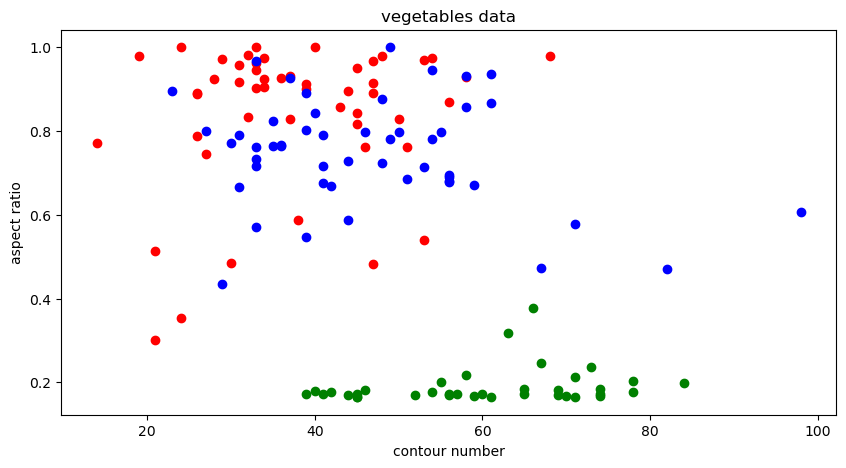

In [4]:
# Um die Spezien im Scatterplot unterschiedlich einzufärben verwenden wir ein Dictonary in dem wir für jede Spezie eine Farbe definieren
colors={0:'r',1:'g',2:'b'}
# erstellen des Scatterplots
fig, ax = plt.subplots(figsize=(10,5)) #Größe Plot  konfigurieren


# In diesem Beispiel werden die Features Sepal_length und Sepal_width verglichen es können aber auch andere Kombination getestet werden
for i  in range(len(vegetables_df['contour number'])):
    ax.scatter(vegetables_df['contour number'][i],
               vegetables_df['aspect ratio'][i],
               color=colors[vegetables_df['class'][i]])
    
ax.set_title('vegetables data')
ax.set_xlabel('contour number')
ax.set_ylabel('aspect ratio')

Für einen schnellen Überblick über die Features können Histogramme für die Features ausgegeben werden. Auch besteht die Möglichkeit mit der Bibliothek pandas.plotting eine Scatter Matrix von allen möglichen Scatterplots des Datensatzes zu erzeugen

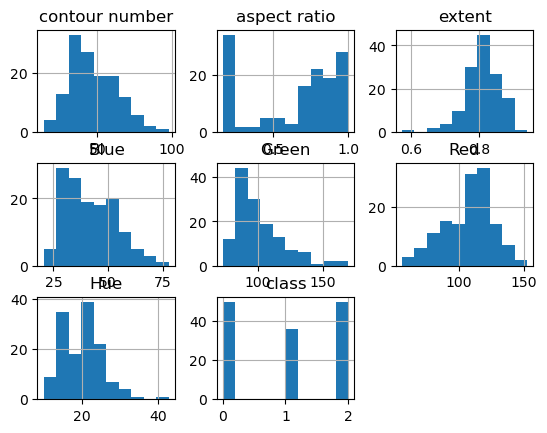

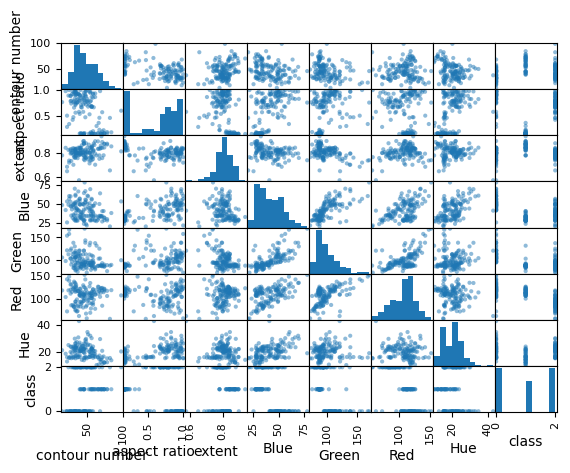

In [5]:
vegetables_df.hist() #berechnet Histogramme aller Spalten
plt.show()

from pandas.plotting import scatter_matrix
scatter_matrix(vegetables_df)
plt.show()

### <font color='2869AF'> 4. Programmieren des Neuronalen Netz</font> 
Für das Neuronale Netz verwenden wir die Bibliothek keras. Bevor der Klassifikator trainiert werden kann, muss die Klassenbezeichnung der Sepzien durch integer ersetzt werden. Anschließend wird die Funktion train_test_split ebenfalls von sklearn verwendet, um den Datensatz in Trainings und Testdaten zu teilen. Nachdem alle Vorbereitungen abgeschlossen sind, kann der Klassifikator trainiert werden


In [6]:
# alten  Datensatz sichern
vegetables_names_df = vegetables_df

# Für jede Klasse eindeutige Zahl setzen
#species_to_int ={'carrot':0,'onion':1, 'potato':2} 

# Klassenspalte überschreiben mit Zahlen
#vegetables_df['class']=vegetables_df['class'].map(species_to_int) 
vegetables_df.head()

,contour number,aspect ratio,extent,Blue,Green,Red,Hue,class
0,28,0.923077,0.803775,42.769815,97.239460,115.102867,19.023609,0
1,68,0.979804,0.836557,63.621205,104.295904,104.446747,29.446747,0
2,51,0.760961,0.823015,59.701164,99.514131,103.025769,32.987531,0
3,31,0.957265,0.767948,50.077372,116.466180,137.658394,22.445255,0
4,50,0.828162,0.845766,60.658955,104.919383,113.961094,34.713985,0


In [7]:
# Teilen des Datensatzes in Features und Labels 

# alles außer die letzte Spalte
X = vegetables_df.iloc[:,:-1]
# nur die letzte Spalte  
y = vegetables_df.iloc[:,-1]

print('X:',X.shape,'y:',y.shape)

X: (136, 7) y: (136,)


In [8]:
# aufteilen des Datensatzes in Train- und Testdaten
from locale import normalize
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                   random_state=42)

print('X_train: ', X_train.shape, ' y_train: ',y_train.shape)
print('X_test: ', X_test.shape, ' y_test: ', y_test.shape)


# Da in jedem Datensatz die  Features eine Unterschiedliche Werteverteilung empfielt es sich die Daten zu normalisieren 
X_train_n=X_train.div(X_train.sum(axis=1),axis=0)
X_test_n=X_test.div(X_test.sum(axis=1),axis=0)




X_train:  (108, 7)  y_train:  (108,)
X_test:  (28, 7)  y_test:  (28,)


In [9]:
# Importieren der Bibliotheken für das NN 
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
#from keras.utils import np_utils
from keras.utils import to_categorical

2024-01-26 10:46:58.193795: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-26 10:46:58.229749: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 10:46:58.366179: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 10:46:58.366233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 10:46:58.389372: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [10]:
# Ändern der Label zu one hot vector jeder Integer wird durch ein binären Vector ersetzt 
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=to_categorical(y_train,num_classes=3)
y_test=to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)



Shape of y_train (108, 3)
Shape of y_test (28, 3)


In [11]:
# Aufbauen des Neuronalen Netz 
# Anzahl und Art der Schichten kann variert werden 

model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [12]:
# Zusammenfassung des Models erzeugen 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 656703 (2.51 MB)
Trainable params: 656703 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Trainieren des Models
model_history=model.fit(X_train_n,y_train,validation_data=(X_test_n,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10


ValueError: in user code:

    File "/home/michelle/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/michelle/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/michelle/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/michelle/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/michelle/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/michelle/.local/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 4), found shape=(None, 7)


### <font color='2869AF'> 5. Auswerten des Klassifikators</font> 
Um das Neuronale Netz zu bewerten werden können verschieden Metriken über den Trainigsverlauf ausgegeben werden und anschließend Testdaten mit dem trainierten Modell vorhergesagt werden

In [ ]:
import numpy as np 

In [ ]:
history_dictonary=model_history.history
# Ausgeben der verfügbaren Metriken und Kennzahlen
print(history_dictonary.keys())

Plotten der Verlustfunktion

In [ ]:
loss_values = history_dictonary['loss']
val_loss_values = history_dictonary['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo',  label='Verlust Training') # bo blauer punkt
plt.plot(epochs, val_loss_values, 'b', label='Verlust Validierung')
plt.title('Wert der Verlustfunktion Training / Validierung')
plt.xlabel('Epochen')
plt.ylabel('Wert der Verlustfunktion')
plt.legend()
plt.show()

Plotten der Korrektklassifizierung 


In [ ]:
plt.clf() #Zeichenbereich löschen
acc = history_dictonary['accuracy']
val_acc = history_dictonary['val_accuracy']

plt.plot(epochs, acc, 'ro',  label='Training') # ro roter punkt
plt.plot(epochs, val_acc, 'r',
        label='Validierung')
plt.title('Korrektklassifizierungsrate Training / Validierung')
plt.xlabel('Epochen')
plt.ylabel('Korrektklassifizierungsrate')
plt.legend()
plt.show()

In [ ]:


prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )